Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None

Head:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

Tail:
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2

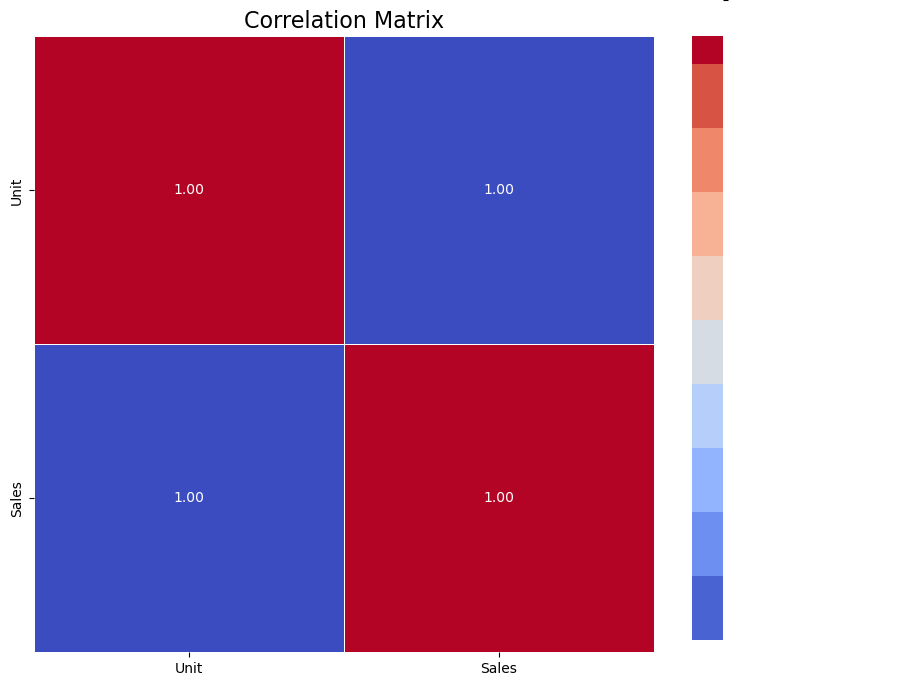

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Dataset input:
df = pd.read_csv('sales_data.csv')

print("Info:")
print(df.info())

#Head:
print("\nHead:")
print(df.head())

#Tail:
print("\nTail:")
print(df.tail())

#Shape:
print("\nShape:")
print(df.shape)

#Columns:
print("\nColumns:")
print(df.columns)

#Duplicate rows:
print("\nDuplicate Rows:")
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

#Variables with null values:
print("\nVariables with Null Values:")
print(df.isnull().sum())

#Impute null values
#For numerical variables, impute with mean
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

#For categorical variables, impute with mode
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop columns
columns_to_drop = ['Column1', 'Column2']  # Define columns to drop based on some rule
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df.drop(columns_to_drop_existing, axis=1, inplace=True)

# Treat categorical and numerical differently
# Categorical
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Numerical
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

#P-values:
for col in numerical_columns:
    p_value = stats.normaltest(df[col])[1]
    if p_value < 0.05:  # Reject null hypothesis that data is normally distributed
        print(f"Column '{col}' is not normally distributed (p-value: {p_value})")

#Representation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
